In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [3]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [4]:
data.index = pd.to_datetime(data.index)

In [13]:
data = data.dropna()

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [14]:
split_1 = int(len(data)*.6)
split_2 = int(len(data)*.9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [15]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,:1]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,:1]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,:1]

In [16]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out)
X_hold = sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [17]:
model1 = sm.OLS(y_in,X_in).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               FedFunds   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     14.83
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           3.09e-09
Time:                        23:36:31   Log-Likelihood:                -1202.0
No. Observations:                 467   AIC:                             2412.
Df Residuals:                     463   BIC:                             2429.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4750      0.985      3.529

# 4.) Recreate the graph fro your model

In [19]:
import matplotlib.pyplot as plt

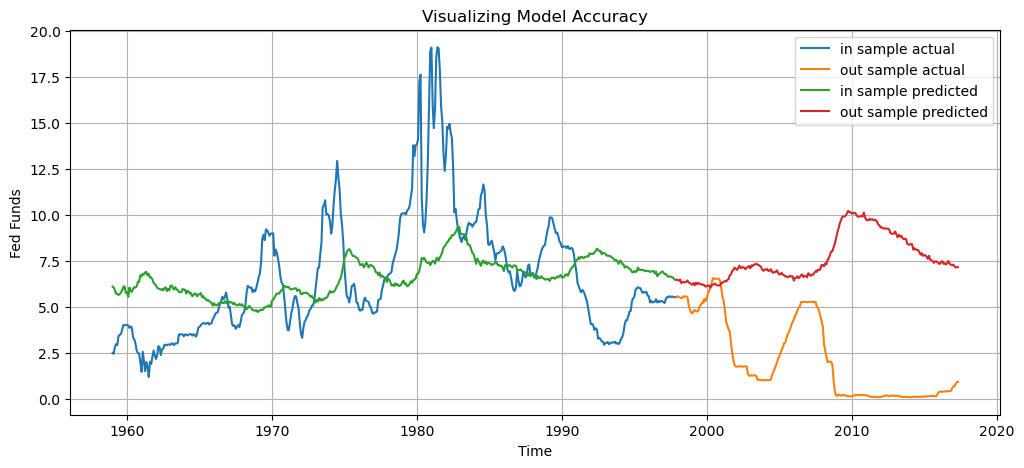

In [20]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend(['in sample actual','out sample actual','in sample predicted','out sample predicted'])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
in_mse_1 = mean_squared_error(y_in,model1.predict(X_in))
out_mse_1 = mean_squared_error(y_out,model1.predict(X_out))

In [23]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.3608278356685


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
max_degrees = 3

DEGREES: 1


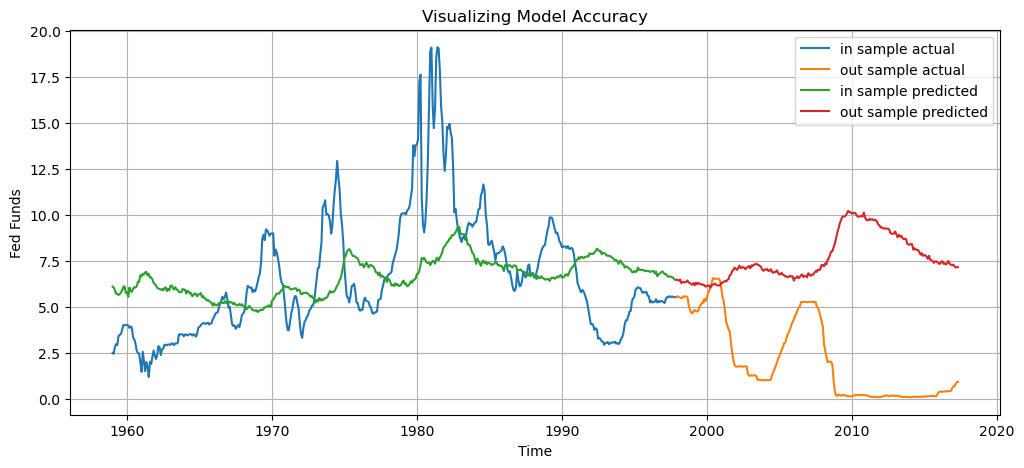

Insample MSE :  10.071422013168641
Outsample MSE :  40.360827835666804
DEGREES: 2


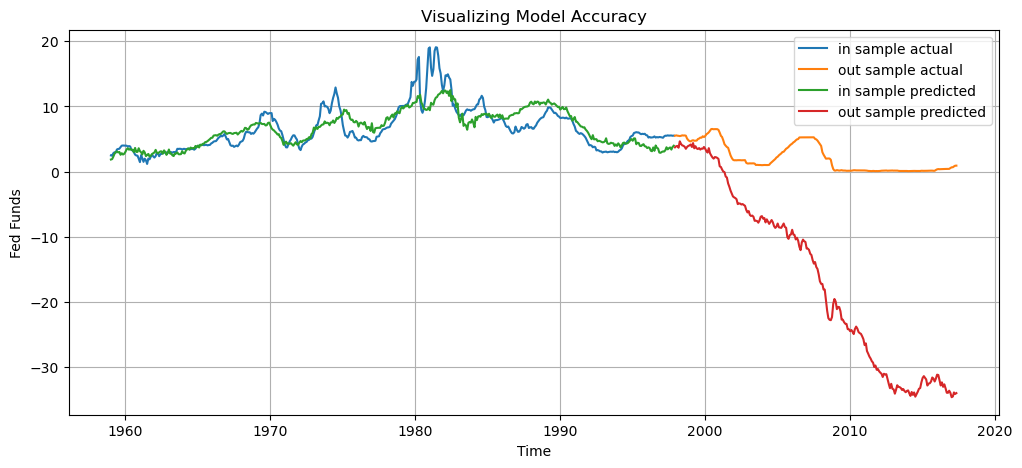

Insample MSE :  3.863477139276068
Outsample MSE :  481.4465099024112
DEGREES: 3


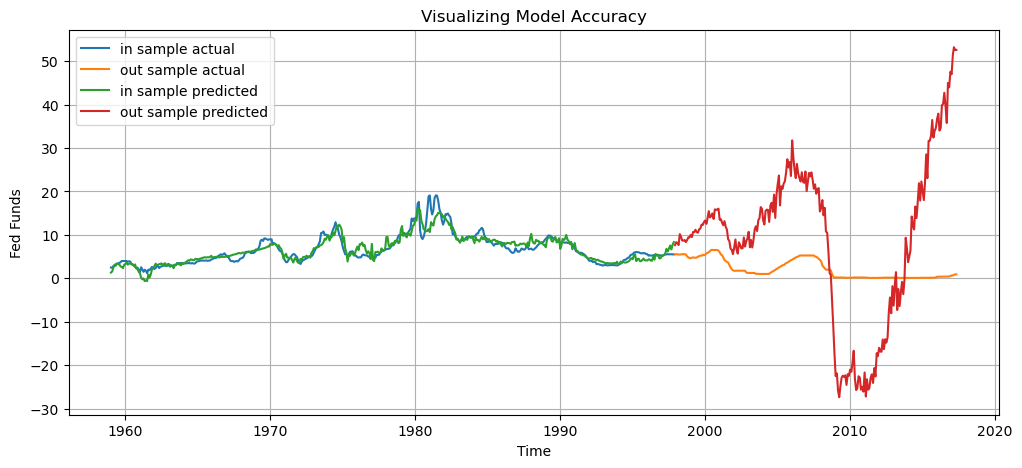

Insample MSE :  1.8723636267986143
Outsample MSE :  371.7663885894949


In [30]:
for degrees in range(1,1+max_degrees):
    print('DEGREES:',degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)
    
    model1 = sm.OLS(y_in,X_in_poly).fit()
    
    plt.figure(figsize = (12,5))

    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds,index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds,index = y_out.index)

    ###
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)
    ###

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(['in sample actual','out sample actual','in sample predicted','out sample predicted'])
    plt.grid()
    plt.show()
    
    in_mse = mean_squared_error(y_in,model1.predict(X_in_poly))
    out_mse = mean_squared_error(y_out,model1.predict(X_out_poly))
    print("Insample MSE : ", in_mse)
    print("Outsample MSE : ", out_mse)


# 7.) State your observations :

As the complexity of the model grows, the models are gradually overfitting, which can be implied by the decrease in Insample MSE but large increase in Outsample MSE.